In [1]:
import networkx as nx
%matplotlib inline 
import pandas as pd

In [43]:
# Load Nodes to graph
nodes = pd.read_json('clean_characters.json')
G = nx.Graph()
nodes_tuples = [(node['Name'], node) for index, node in nodes.iterrows()]
G.add_nodes_from(nodes_tuples)
print(nodes[['Name', 'School', 'house']].sort_values(by=['School', 'house']))


                    Name               School       house
9         Fleur Delacour          Beauxbatons         NaN
27        Nicolas Flamel          Beauxbatons         NaN
29         Olympe Maxime  Beauxbatons - Staff         NaN
44           Viktor Krum           Durmstrang         NaN
18        Igor Karkaroff   Durmstrang - Staff         NaN
17      Hermione Granger             Hogwarts  Gryffindor
19        Lavender Brown             Hogwarts  Gryffindor
30       Peter Pettigrew             Hogwarts  Gryffindor
32          Harry Potter             Hogwarts  Gryffindor
33          James Potter             Hogwarts  Gryffindor
34           Lily Potter             Hogwarts  Gryffindor
38       Seamus Finnigan             Hogwarts  Gryffindor
39          Sirius Black             Hogwarts  Gryffindor
47        Arthur Weasley             Hogwarts  Gryffindor
48       Charlie Weasley             Hogwarts  Gryffindor
49          Fred Weasley             Hogwarts  Gryffindor
50        Geor

In [44]:
# Load Edges
edges = pd.read_csv('cleanRelations.csv')
for index, edge in edges.iterrows():  # mark edge in green if the relation is friends, else mark in red (enemies)
    if edge[2] == '+':
        G.add_edge(edge[0], edge[1], sign=edge[2], color='black')

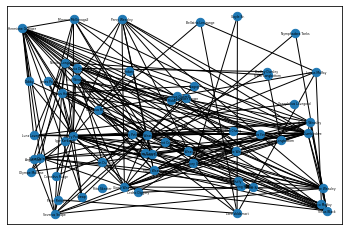

In [51]:
# random layout

nx.draw_networkx(G, nx.random_layout(G), font_size=3, node_size=70, width=1)

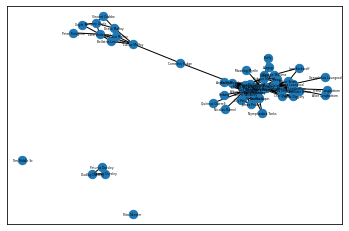

In [50]:
# spring layout

nx.draw_networkx(G, nx.spring_layout(G), font_size=3, node_size=70, width=1)

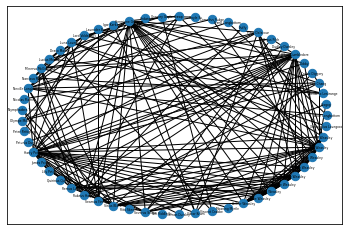

In [49]:
# circular layout

nx.draw_networkx(G, nx.circular_layout(G), font_size=3, node_size=70, width=1)

In [52]:
import matplotlib.pyplot as plt

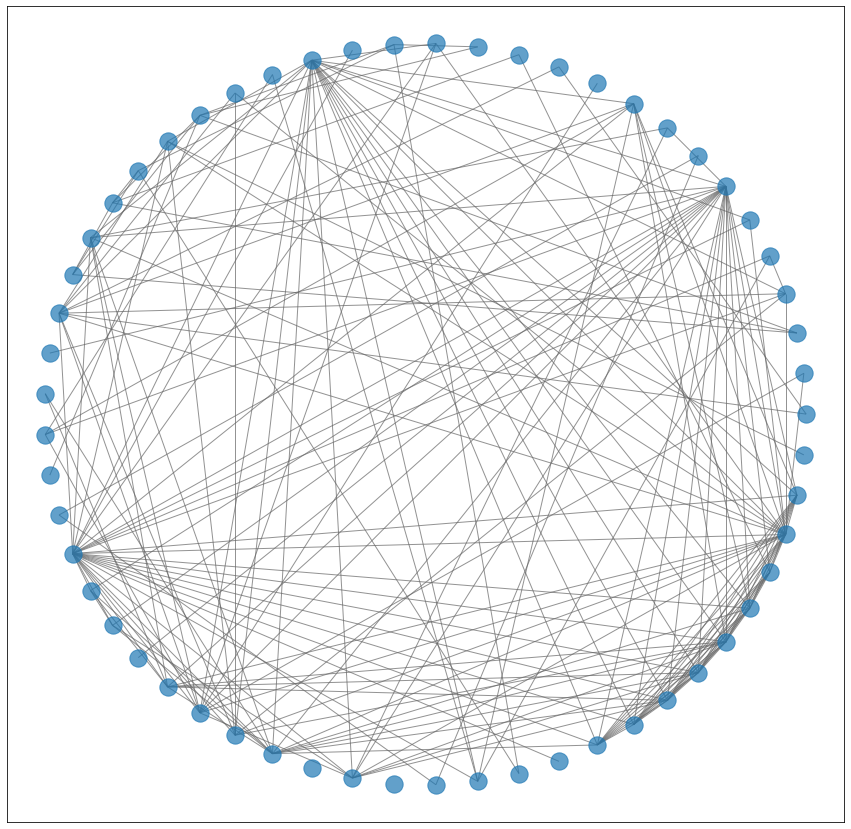

In [53]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G, nx.circular_layout(G), alpha=0.7, with_labels=False, edge_color='.4')

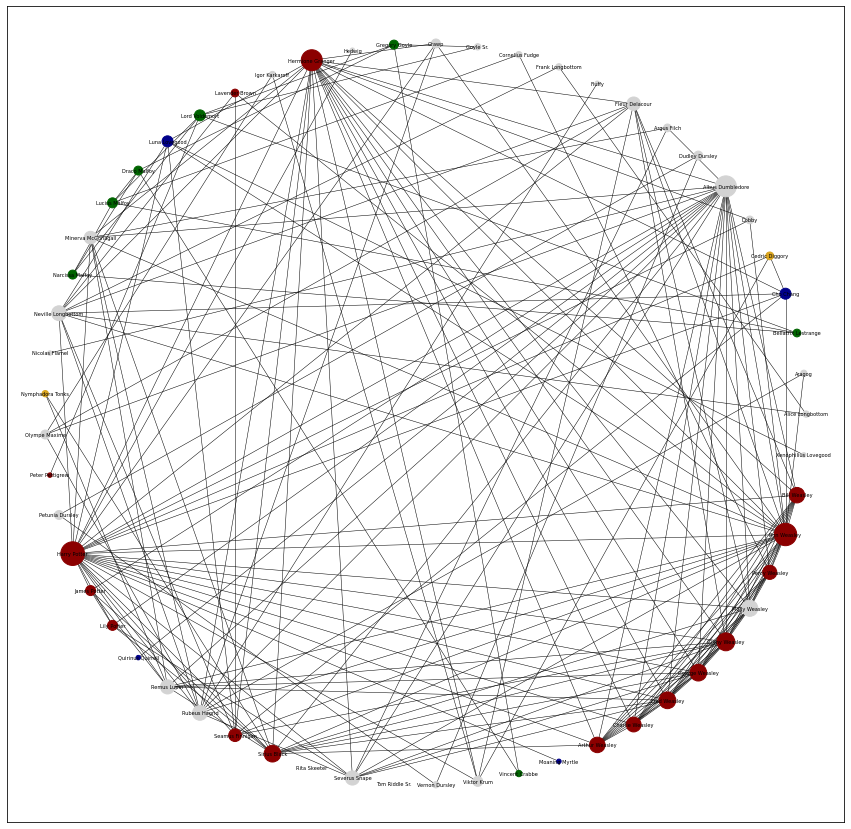

In [55]:
node_size = [G.degree(v) * 20 for v in G] # Size will be the degree
plt.figure(3,figsize=(15,15))

## Color nodes in house colors
house_colors = {'Slytherin':'darkgreen', 'Ravenclaw':'darkblue', 'Hufflepuff':'goldenrod','Gryffindor': 'darkred', 'other':'lightgray'}
node_color = [house_colors[character['house']] if character['house'] in house_colors else house_colors['other'] for name, character in G.nodes(data=True) ]

## color edges
colors = nx.get_edge_attributes(G,'color').values()

## draw graph
nx.draw_networkx(G, nx.circular_layout(G), font_size=5, width=0.5, edge_color=colors, node_size=node_size, node_color=node_color)